In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [20]:
def plot_aprroximate(list_1 , list_2 , approx : int , title : str = None , xlabel : str = None , ylabel : str = None , saveas : str = None):
  """
  Smoothens the curve
  
  Args:
  list_1 : X axis
  list1_2 : Y axis
  approx : Value by how much the approximation has to be done
  title : Title of the resulting plot
  xlabel : x axis label
  ylabel : y axis label

  Returns:
  image of a Plot
  
  """
  
  list_x,list_y = list_1 , list_2
  plt.figure()
  poly = np.polyfit(list_x,list_y , approx)
  poly_y = np.poly1d(poly)(list_x)
  plt.plot(list_x,poly_y)
  if xlabel != None:
    plt.xlabel(xlabel)
  if ylabel != None:
    plt.ylabel(ylabel)
  
  # plt.ylim(0, 1)
  plt.title(title)

  if saveas != None:
    plt.savefig(saveas)
  plt.show()

In [3]:
def string_to_float_list(string_data):
    # Remove square brackets and split the string by commas
    values_str = string_data.strip('[]')
    float_list = [float(val.strip()) for val in values_str.split(',')]

    return float_list

In [4]:
# prompt: stretch or shrink a list based on the length provided

def stretch_or_shrink(list1, length):
  """
  Stretches or shrinks a list to a given length by repeating or removing elements.

  Args:
    list1: The list to be stretched or shrunk.
    length: The desired length of the list.

  Returns:
    A stretched or shrunk list.
  """

  if length < len(list1):
    return list1[:length]
  elif length > len(list1):
    return list1 + [list1[-1]] * (length - len(list1))
  else:
    return list1


In [6]:
action_movies_intensities = pd.read_csv("/Users/mohamedmafaz/Desktop/Trailer Analysis/Intensities/action_movies100.csv")
action_movies_intensities_list = []
for rows in range(action_movies_intensities.shape[0]):
    string_list_of_intensities = action_movies_intensities.iloc[rows]["combined_array"]
    float_list_of_intensities = string_to_float_list(string_list_of_intensities)
    action_movies_intensities_list.append(float_list_of_intensities)

len(action_movies_intensities_list)

96

In [7]:
sum([len(i) for i in action_movies_intensities_list]) / len(action_movies_intensities_list)

3492.3541666666665

In [8]:
# Aproimating it to 3500

def normalize(data):
    min_val = min(data)
    max_val = max(data)

    normalized = [(x - min_val) / (max_val - min_val) for x in data]
    return normalized

action_movies_intensities_list_normalized = []
for rows in range(action_movies_intensities.shape[0]):
    string_list_of_intensities = action_movies_intensities.iloc[rows]["combined_array"]
    float_list_of_intensities = string_to_float_list(string_list_of_intensities)

    if max(float_list_of_intensities) == 0.0:
        pass
    else:
        float_list_of_intensities_normalized = normalize(stretch_or_shrink(float_list_of_intensities , 3500)) # Normalizing it to [0-1] and streching or shrinking it to 3500 in lenght
        action_movies_intensities_list_normalized.append(float_list_of_intensities_normalized)

In [9]:
dropped = action_movies_intensities.shape[0] - len(action_movies_intensities_list_normalized) 
print(f"{dropped} record dropped due to them being completely blank")

1 record dropped due to them being completely blank


In [10]:
movie_name_list = list(action_movies_intensities["movie"])
movie_name_list

['The Way of the Dragon (Meng long guo jiang) Trailer.',
 'Mission Impossible - Fallout (2018) - Official Trailer - Paramount Pictures.',
 'The Bourne Ultimatum Official Trailer 1 - David Strathairn Movie (2007) HD.',
 'The Last Boy Scout - Trailer (HD) (1991).',
 'Return to a better Tomorrow [Sun ying hong boon sik (1994)] - Trailer.',
 'Bullitt (1968) Official Trailer - Steve McQueen Movie.',
 'Inception (2010) Official Trailer 1 - Christopher Nolan Movie HD.',
 'Red Heat 1988 Trailer  Arnold Schwarzenegger  Jim Belushi.',
 'HEAT - Trailer - (1995) - HQ.',
 'Official Trailer Die Hard - With a Vengeance (1995).',
 'Fast Five - Theatrical Trailer.',
 'The Dark Knight (2008) Official Trailer 1 - Christopher Nolan Movie HD.',
 'Crank High Voltage (2009) - Official Trailer.',
 'Dredd 3D Official Trailer 1 (2012) - Karl Urban Movie HD.',
 'Aliens (1986) Trailer 1  Movieclips Classic Trailers.',
 'Theatrical Trailer - Assault On Precinct 13 (1976).',
 'The Bourne Supremacy Official Trailer 

In [11]:
avg_intensity = np.mean(np.array(action_movies_intensities_list_normalized) ,  axis=0)
avg_intensity = normalize(avg_intensity) # Normalizing the average
avg_intensity

[0.0017599872278364088,
 0.0,
 0.003609499201892528,
 0.03348036520018897,
 0.05917301250797987,
 0.07239073067229701,
 0.09817984469014022,
 0.09989081233069483,
 0.11232101111591977,
 0.11499847069821444,
 0.11609081244802544,
 0.138564856312202,
 0.12932169918053943,
 0.12894288138823295,
 0.12812774055175444,
 0.13205952316003425,
 0.14641983931455188,
 0.1545416419223458,
 0.24524332193747747,
 0.24809698545343675,
 0.24642461211952016,
 0.24705362140649764,
 0.2519365750396027,
 0.2612989902958687,
 0.29755198887742795,
 0.3032773753162576,
 0.29612352053111074,
 0.3010333770979919,
 0.2957803169552912,
 0.2968470035105981,
 0.284143291041476,
 0.2776082879402329,
 0.26719394559906706,
 0.25507306154468345,
 0.2549707008663612,
 0.2533743421900812,
 0.2631733477849186,
 0.24964908198360894,
 0.23903956415881566,
 0.2521351987105264,
 0.2509798602861069,
 0.21044147535530155,
 0.21880626425673153,
 0.22371895890692048,
 0.2015110368990298,
 0.1982287322495838,
 0.20095514226571756

Text(0, 0.5, 'Intensity')

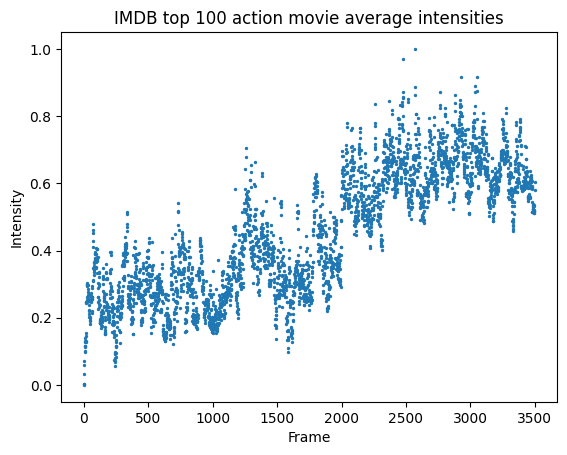

In [12]:
plt.scatter(range(3500) , avg_intensity , s = 2)
plt.title("IMDB top 100 action movie average intensities")
plt.xlabel("Frame")
plt.ylabel("Intensity")

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3925468303.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_data, y_data, degree)


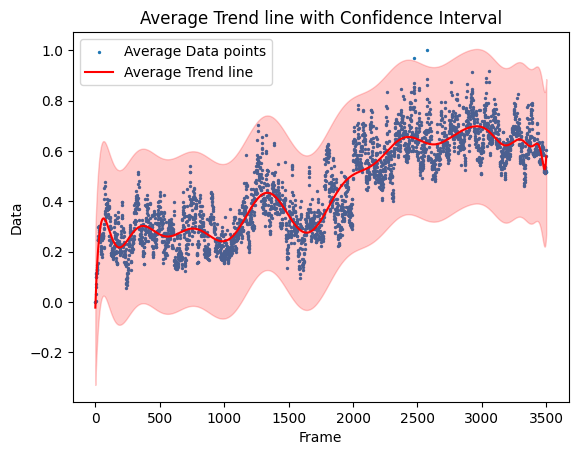

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your data in the 'y_data' variable
y_data = avg_intensity

# Create an array for the x-values corresponding to the indices of the 'y_data'
x_data = np.arange(len(y_data))

# Perform linear regression using polyfit
degree = 40
coefficients = np.polyfit(x_data, y_data, degree)

# Create a function based on the coefficients to represent the regression line
poly_function = np.poly1d(coefficients)

# Generate y-values for the regression line
regression_line = poly_function(x_data)

# Calculate confidence interval (adjust the value as needed)
confidence = 1.645 * np.std(y_data)  # Assuming 95% confidence

# Plot the original data and the regression line with shaded area for uncertainty
plt.scatter(x_data, y_data, label='Average Data points', s=2)
plt.plot(x_data, regression_line, color='red', label='Average Trend line')

# Shaded area for confidence interval
plt.fill_between(x_data, regression_line - confidence, regression_line + confidence, color='red', alpha=0.2)

plt.xlabel('Frame')
plt.ylabel('Data')
plt.title('Average Trend line with Confidence Interval')
plt.legend()
plt.show()


In [14]:
from sklearn.metrics import r2_score
r2 = r2_score(avg_intensity, regression_line)
r2

0.8058743778984672

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


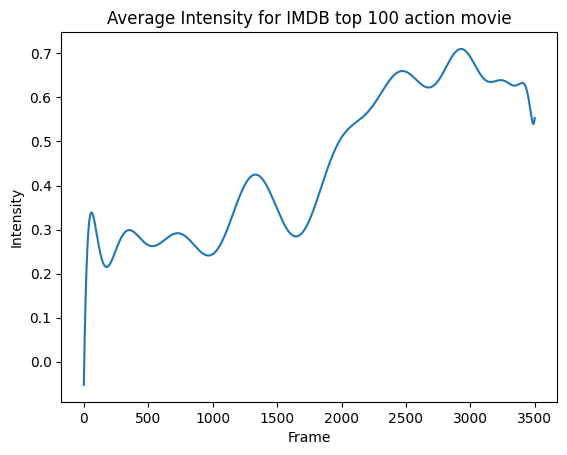

In [21]:
plot_aprroximate(range(3500) , avg_intensity , 30 , title = "Average Intensity for IMDB top 100 action movie" , 
                 xlabel="Frame" , ylabel="Intensity" , saveas = f'/Users/mohamedmafaz/Desktop/Trailer Analysis/Average pngs/Action100.png')


/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


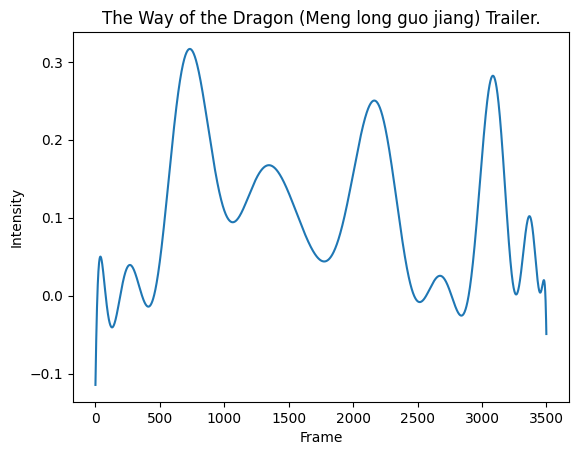

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


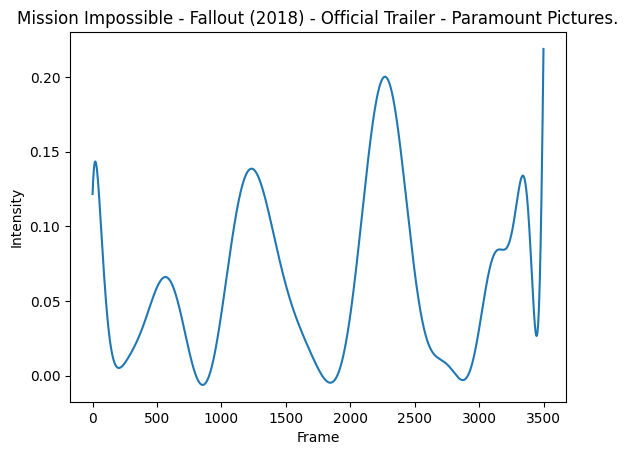

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


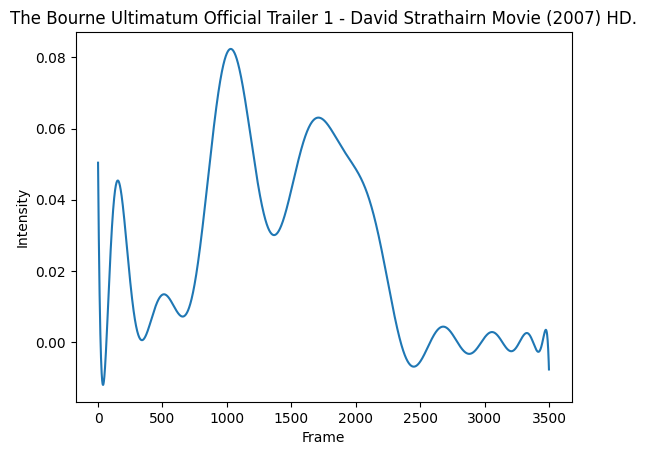

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


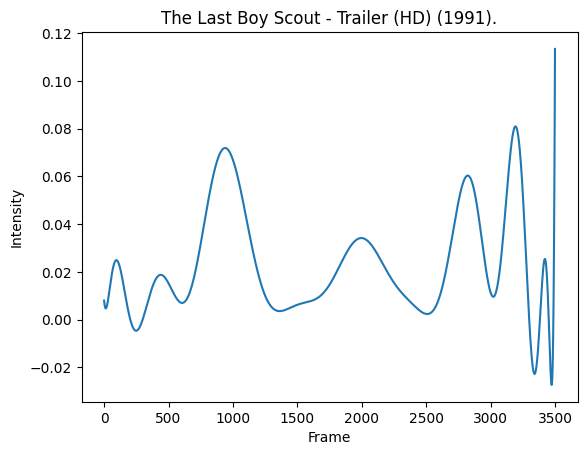

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


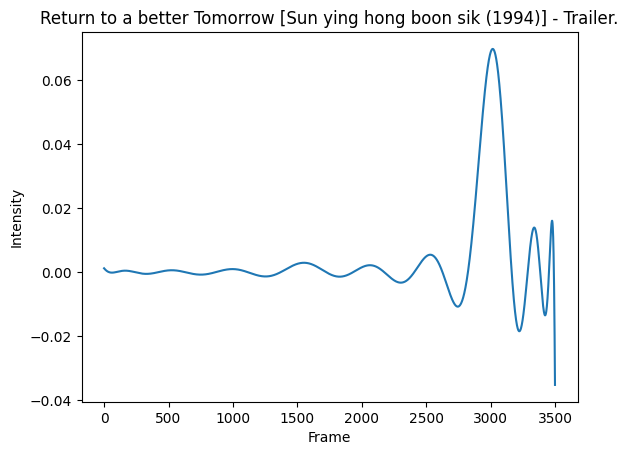

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


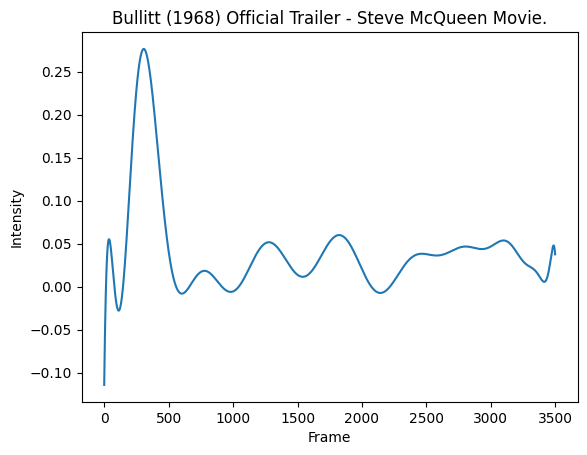

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


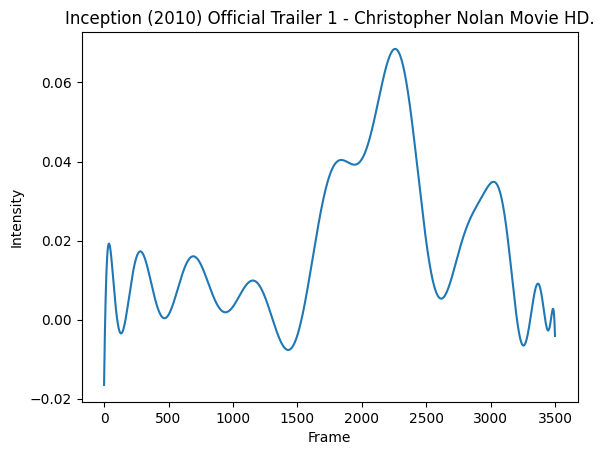

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


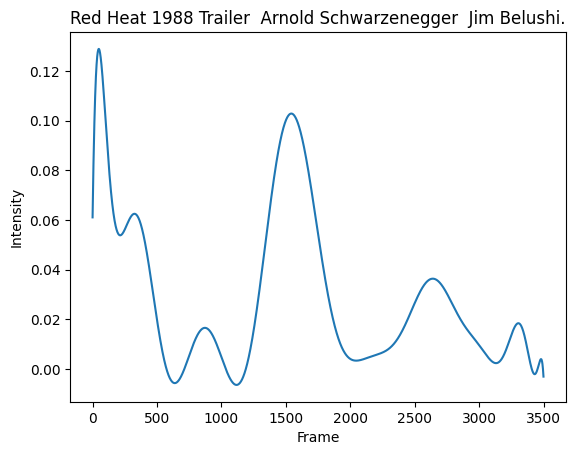

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


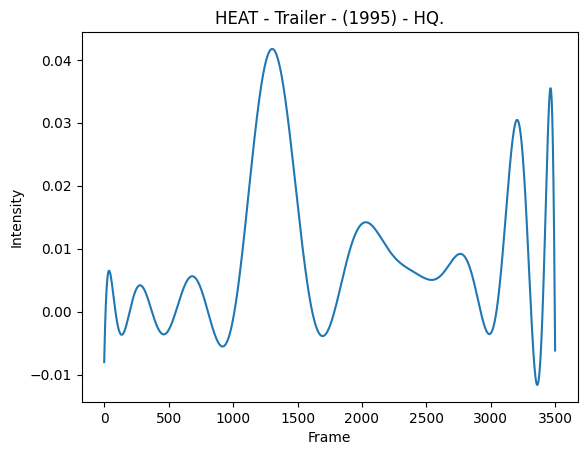

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


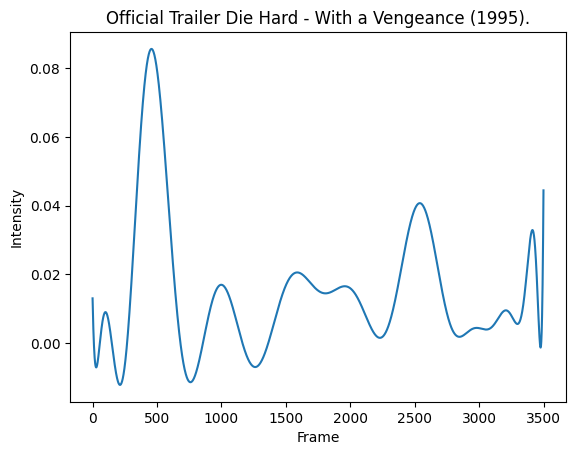

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


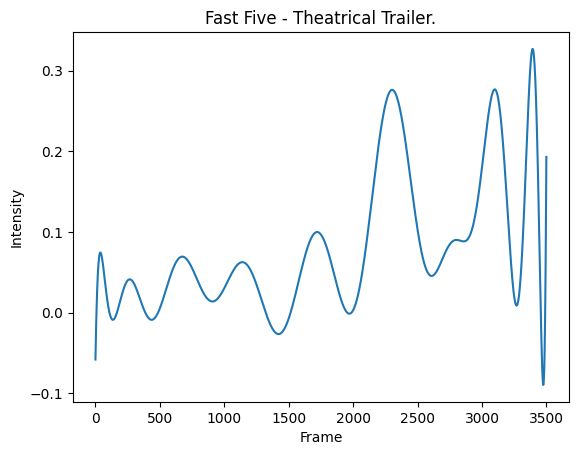

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


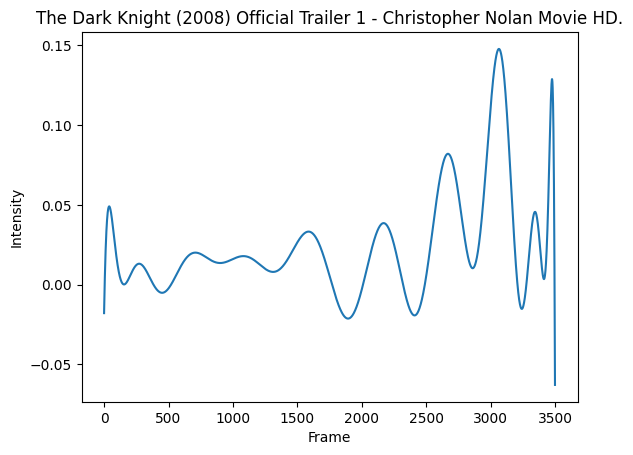

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


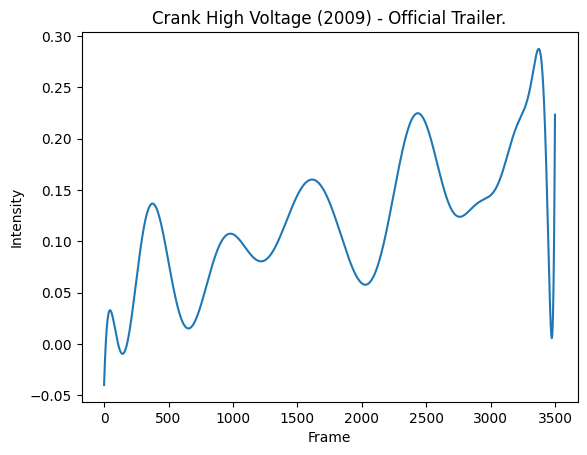

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


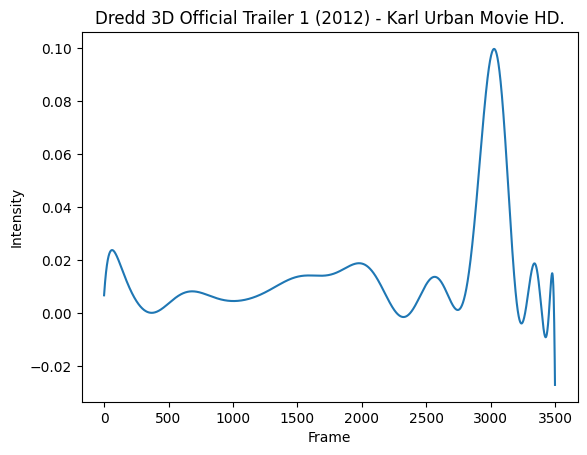

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


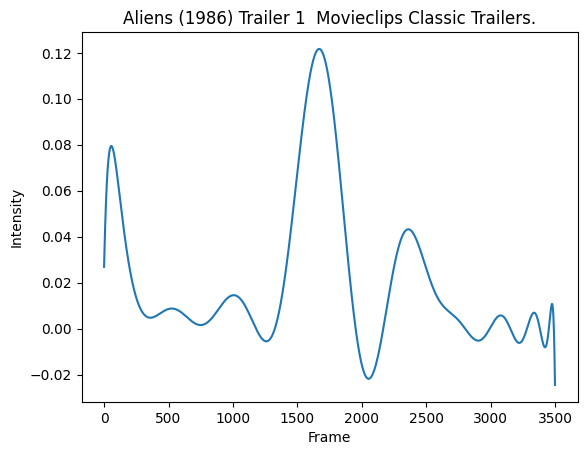

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


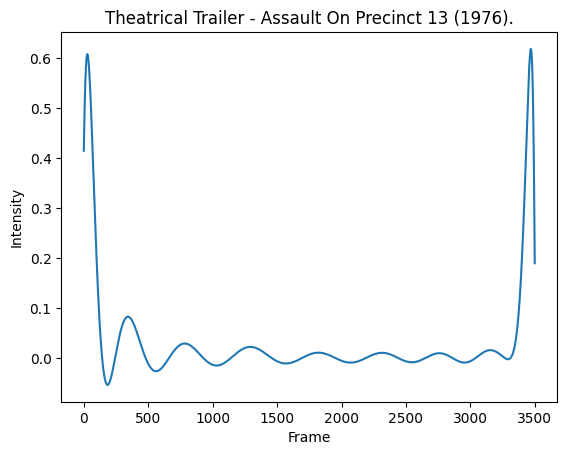

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


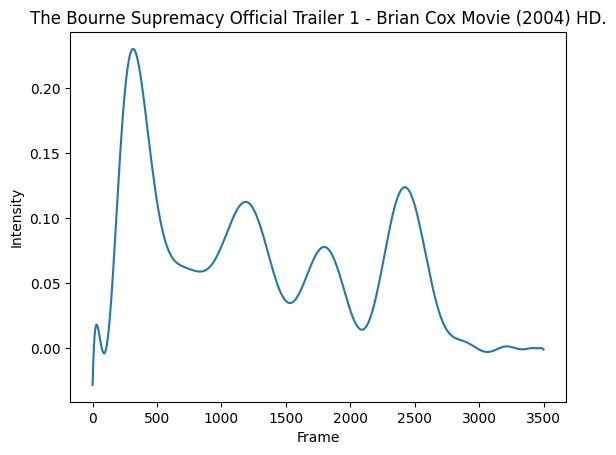

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


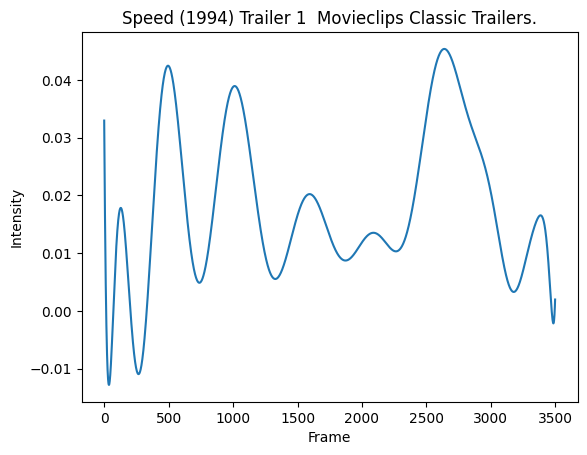

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


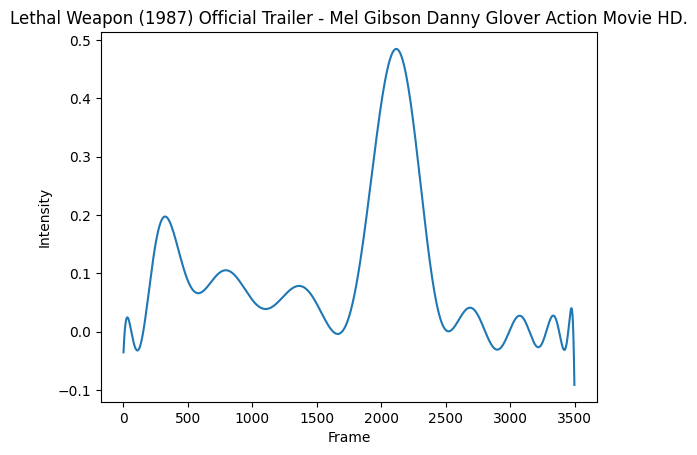

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


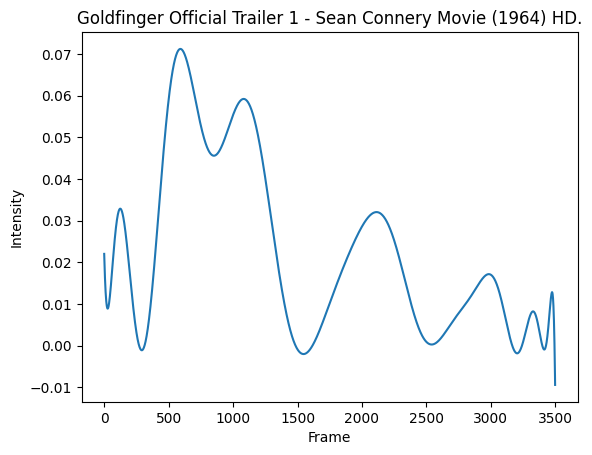

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


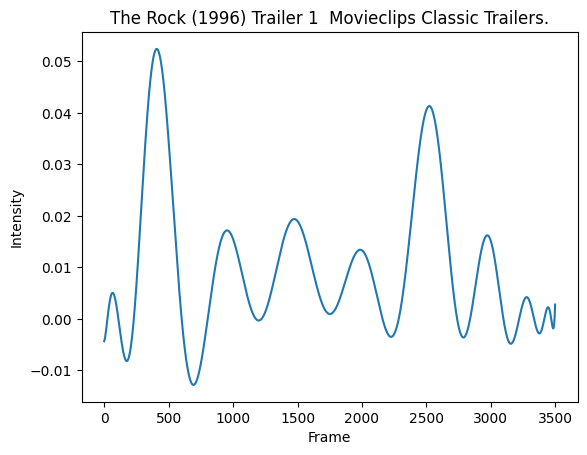

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


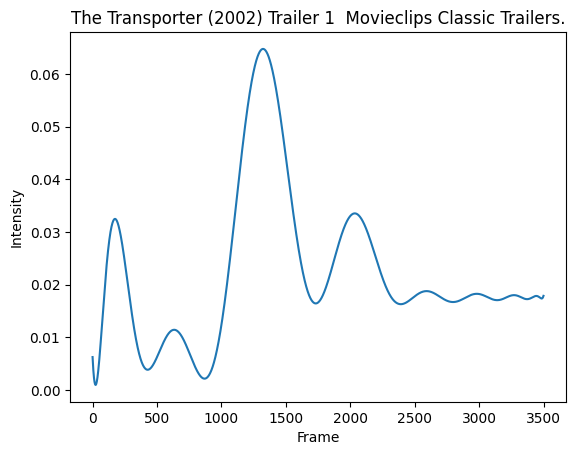

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


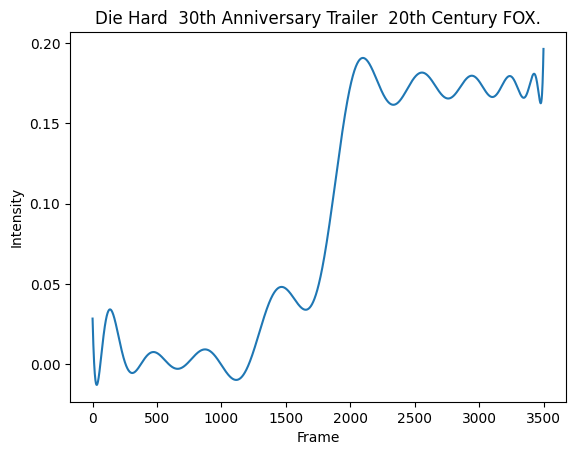

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


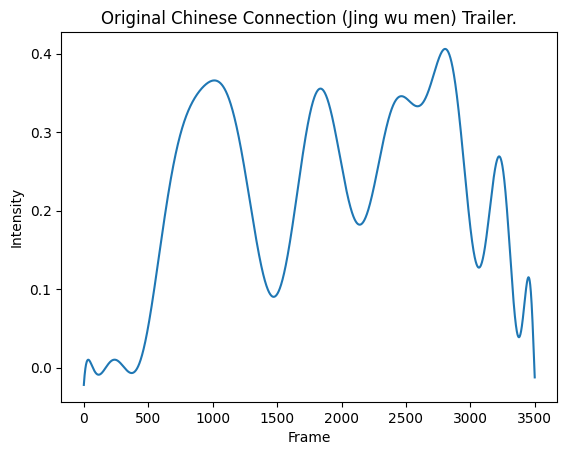

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


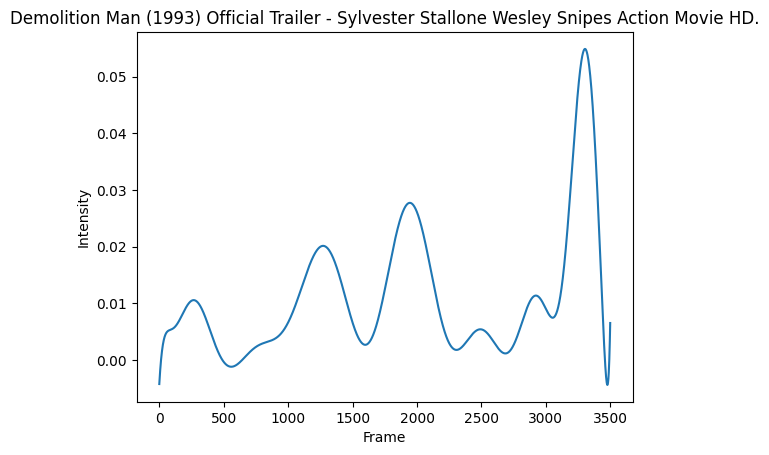

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


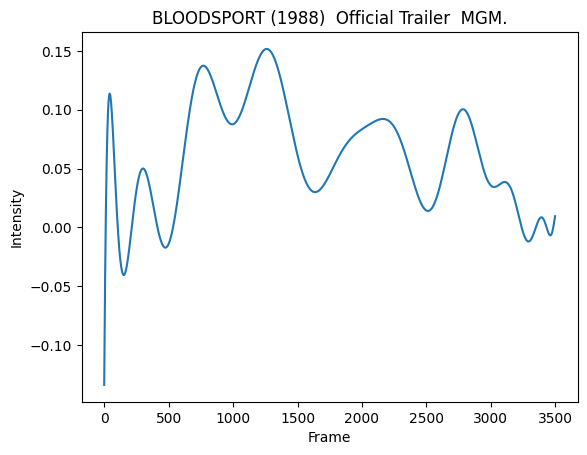

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


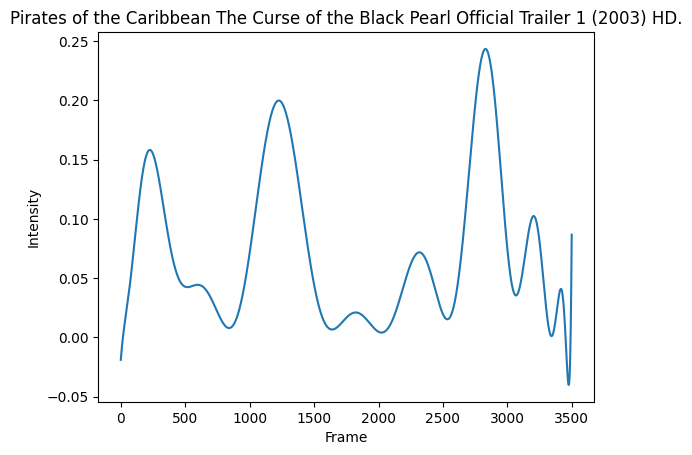

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


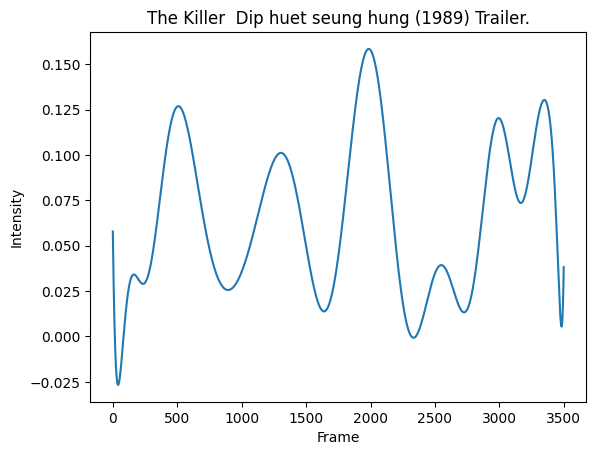

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


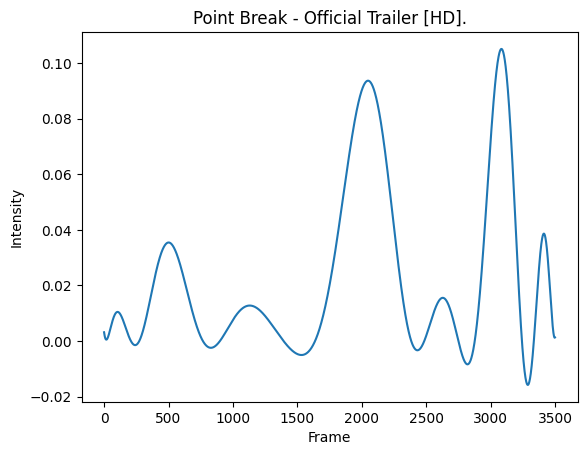

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


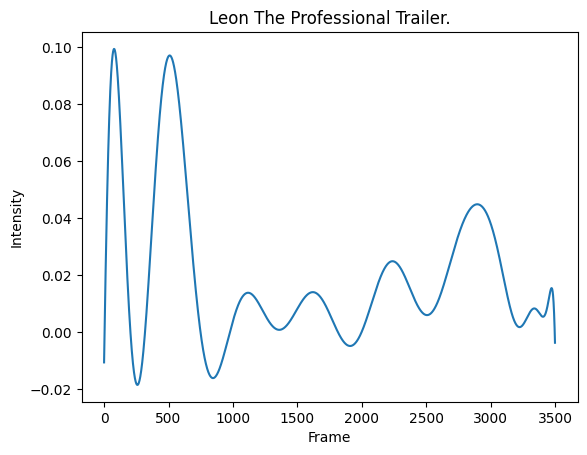

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


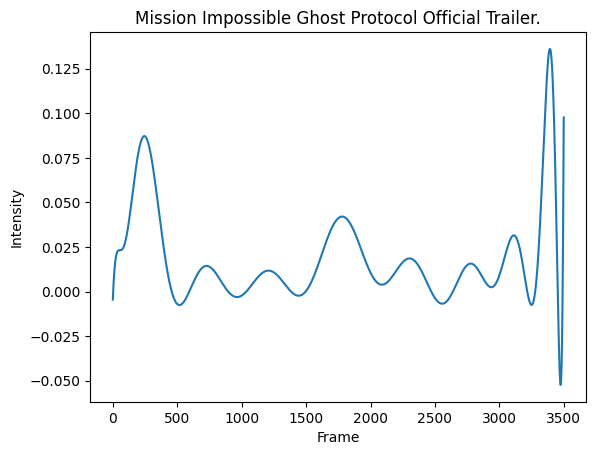

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


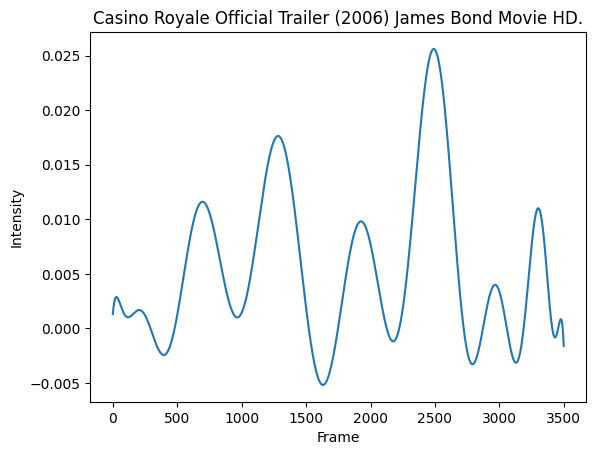

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


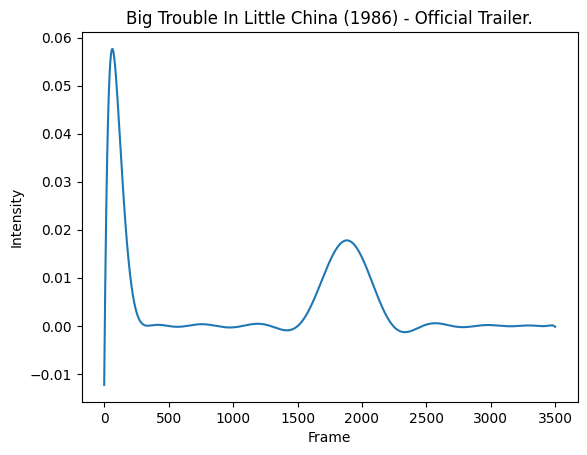

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


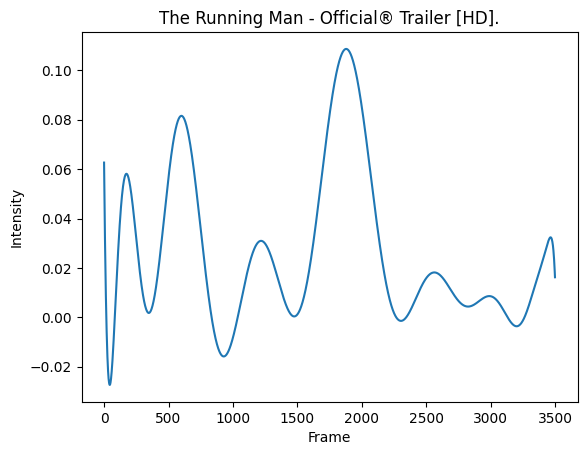

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


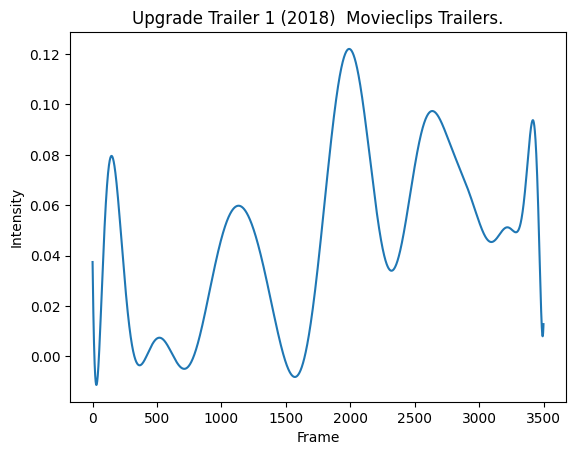

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


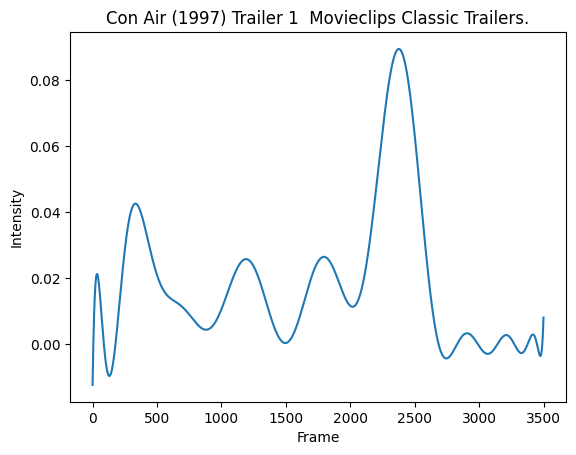

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


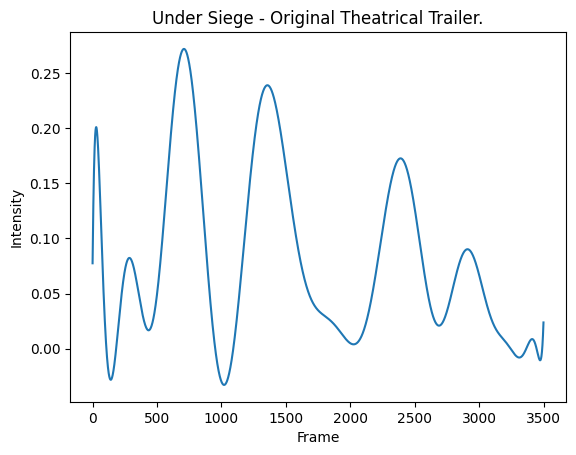

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


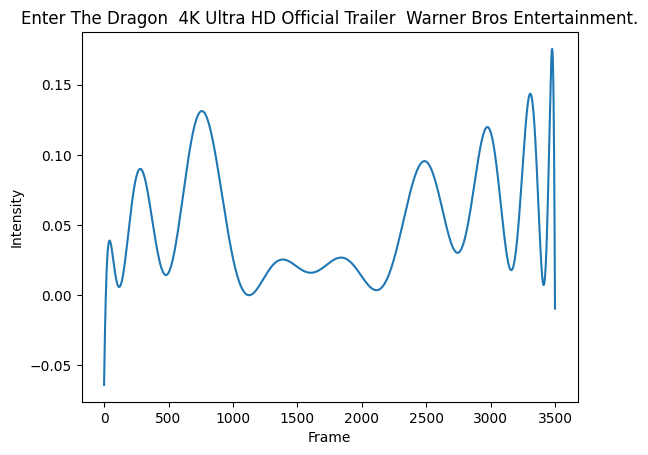

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


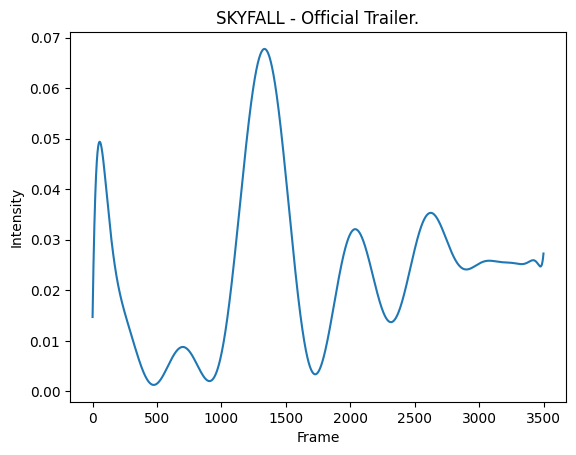

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


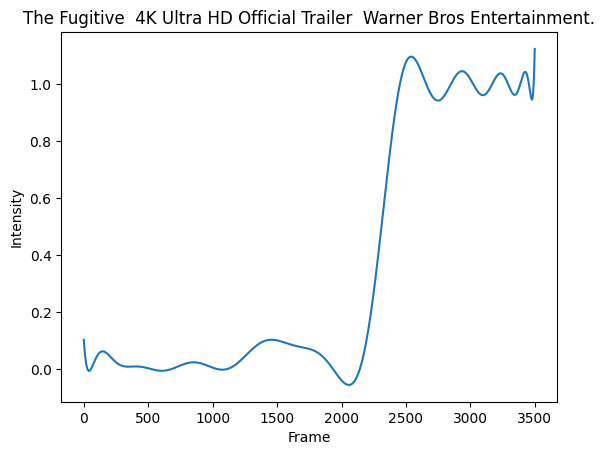

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


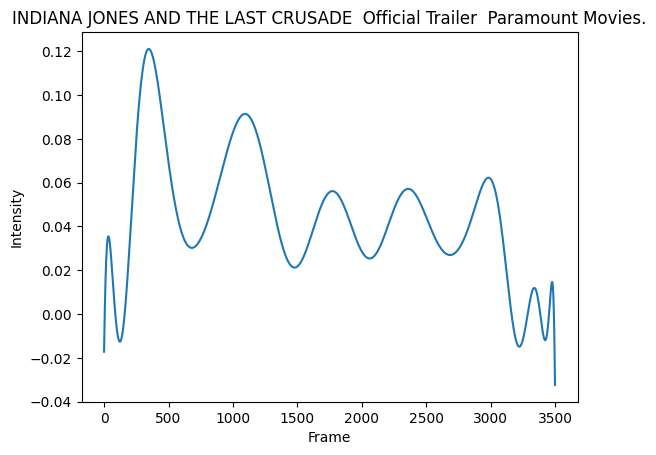

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


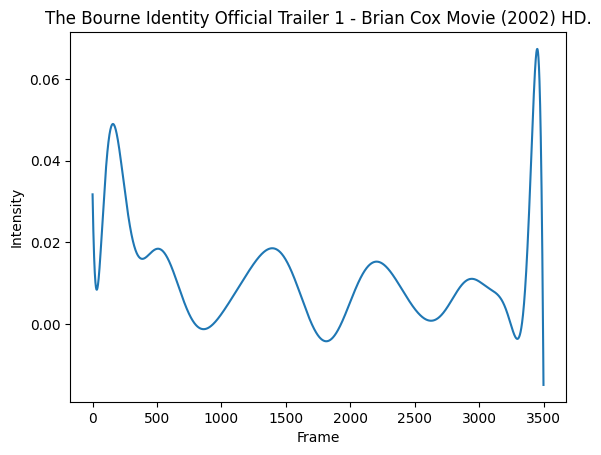

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


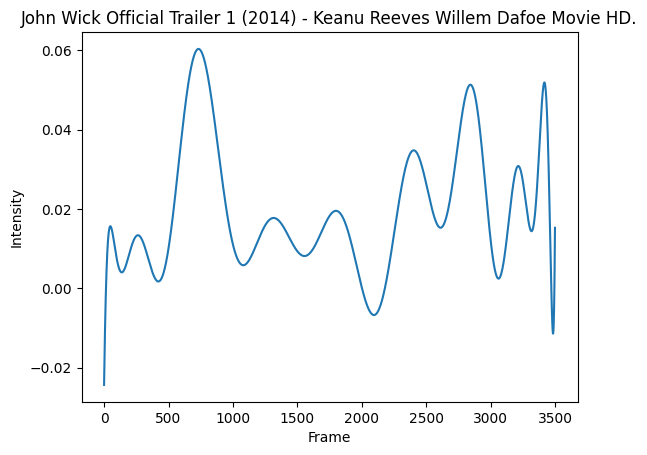

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


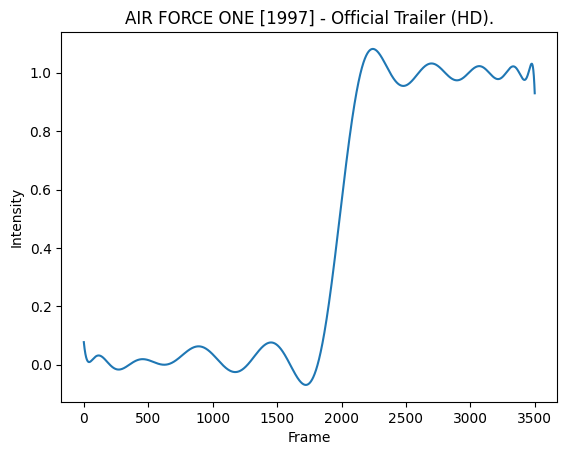

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


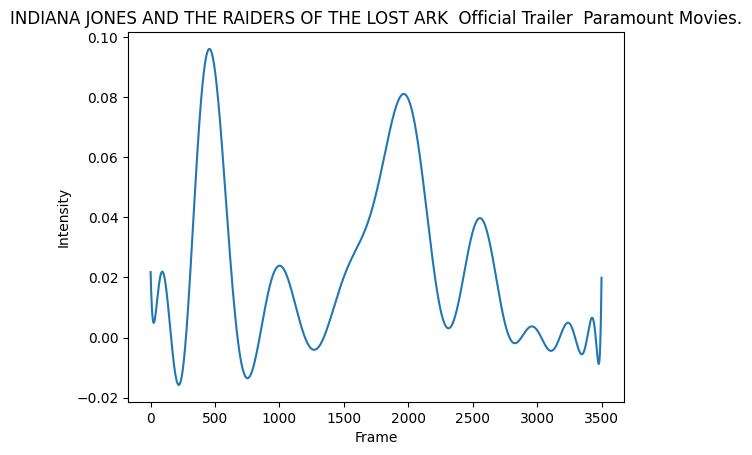

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


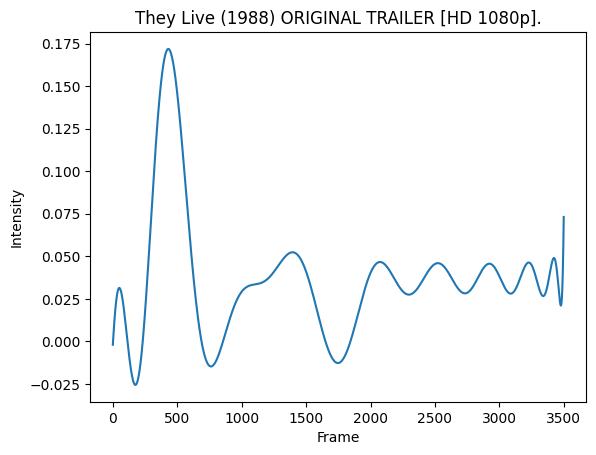

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


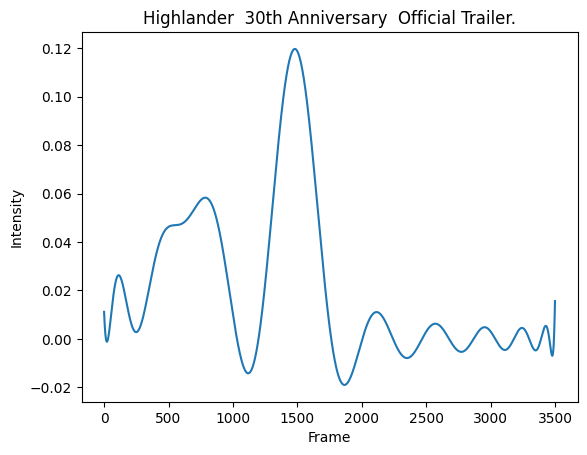

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


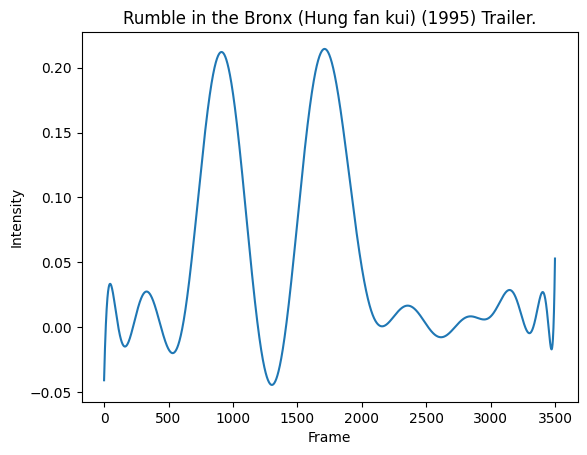

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


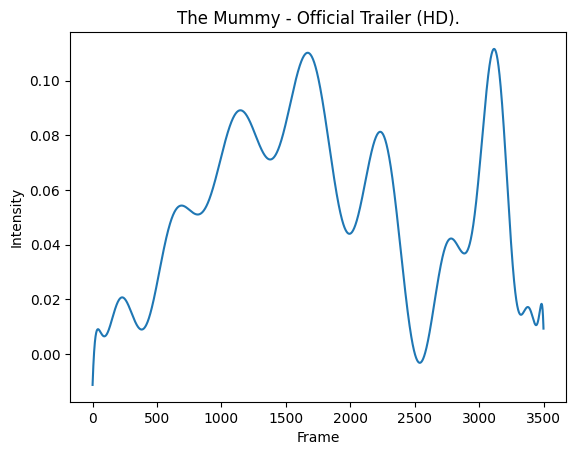

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


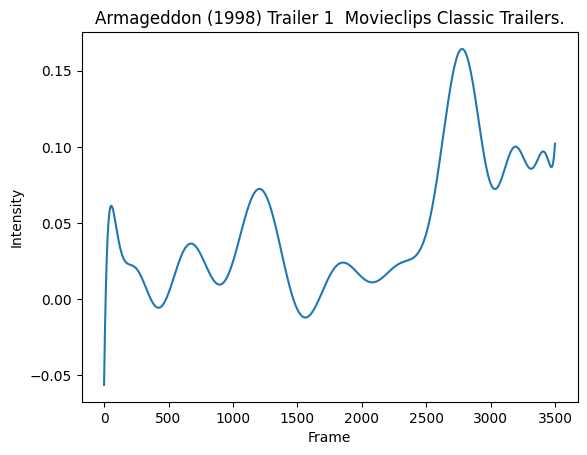

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


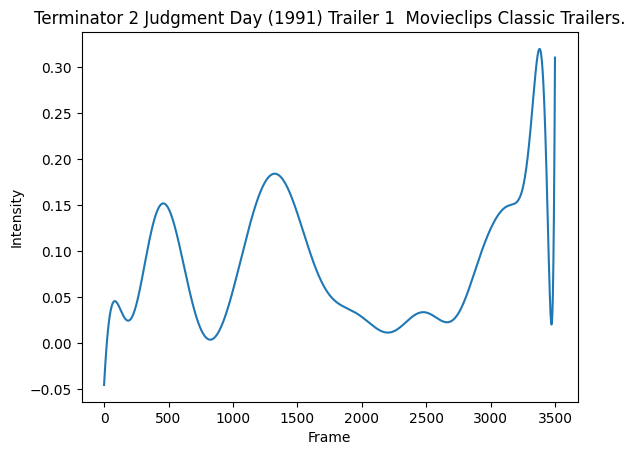

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


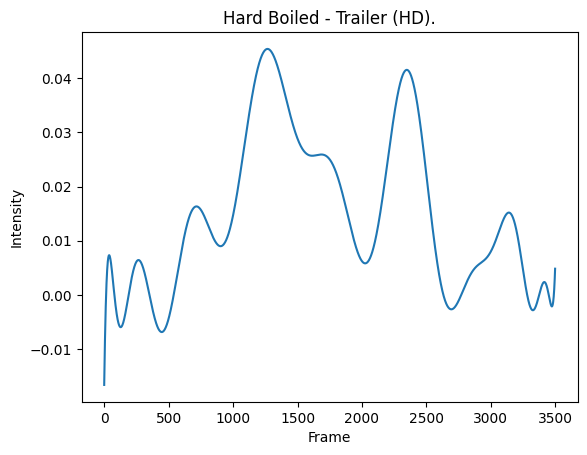

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


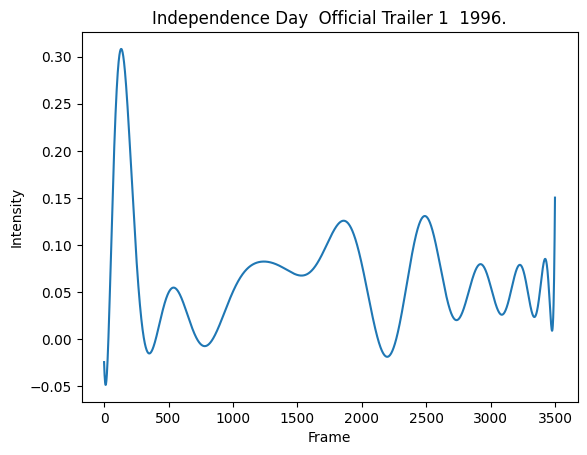

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


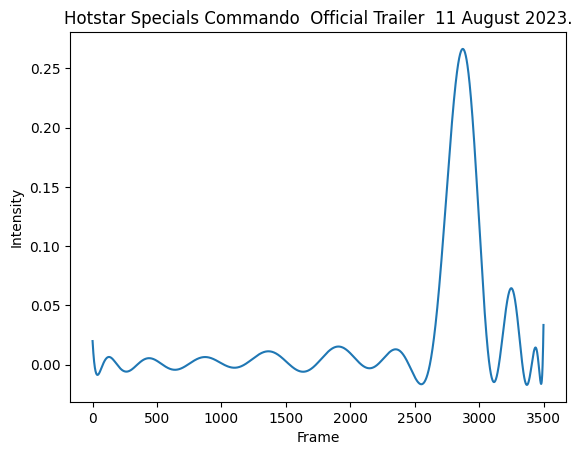

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


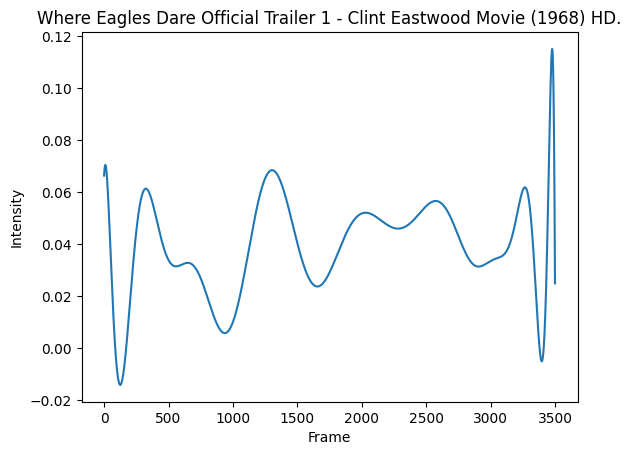

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


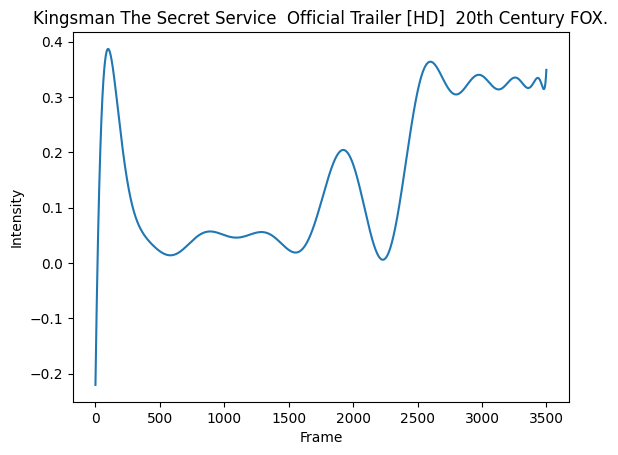

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


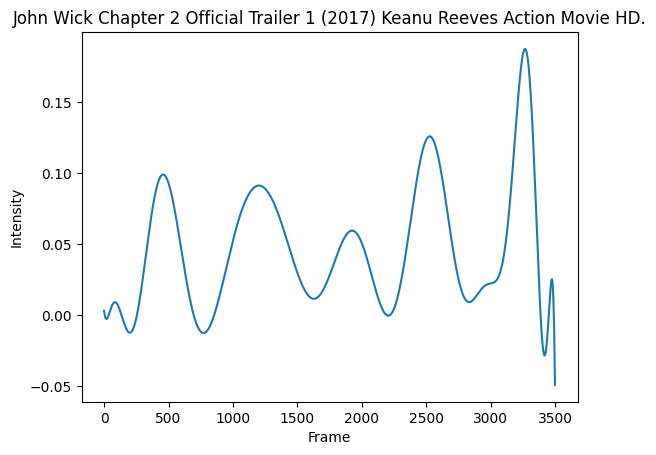

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


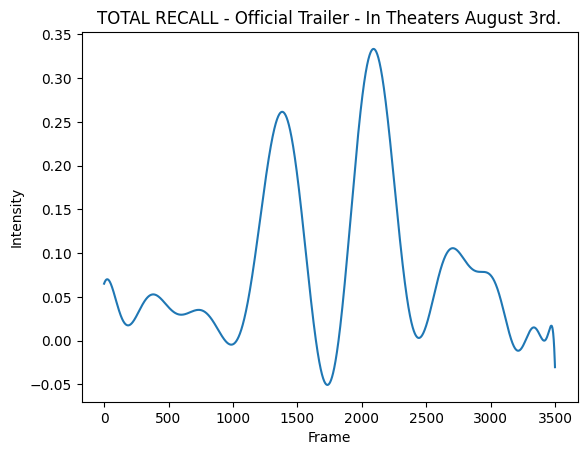

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


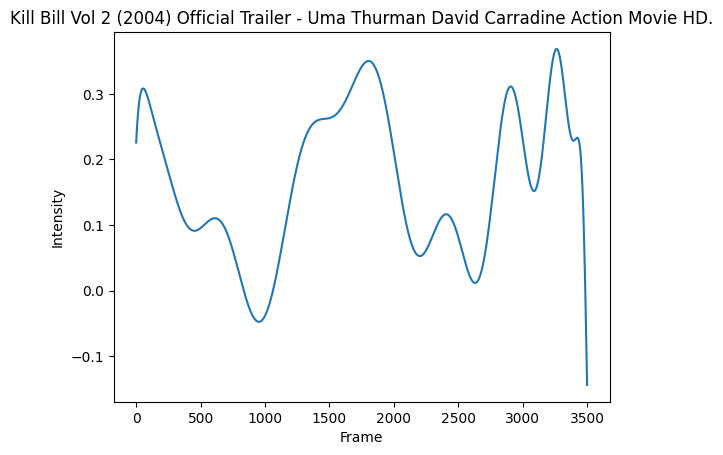

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


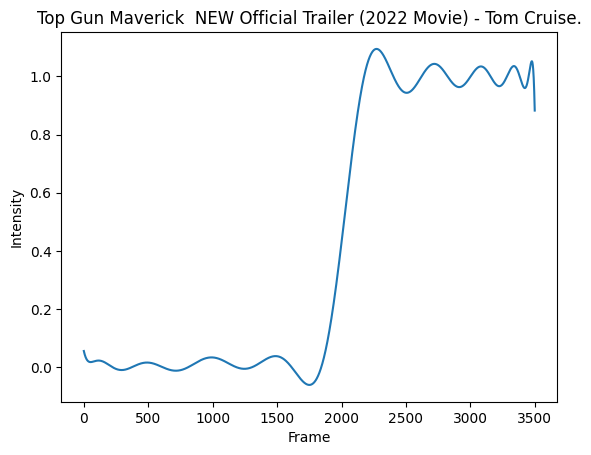

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


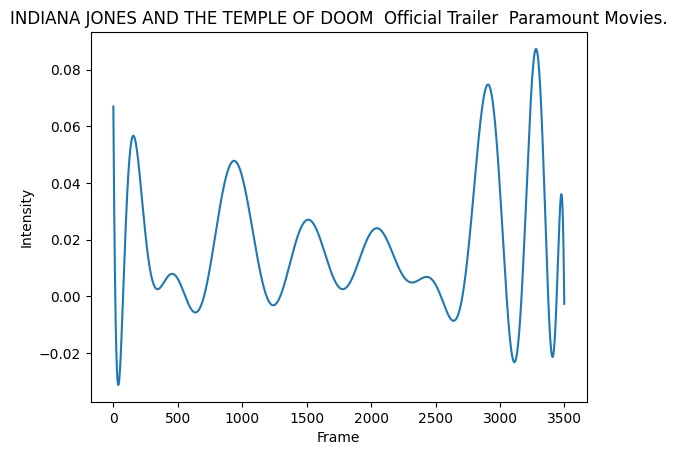

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


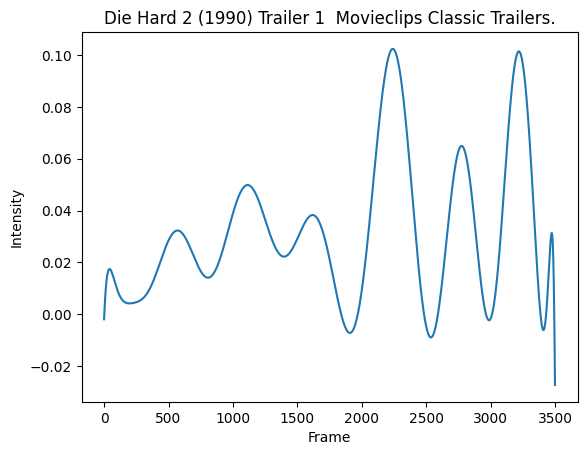

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


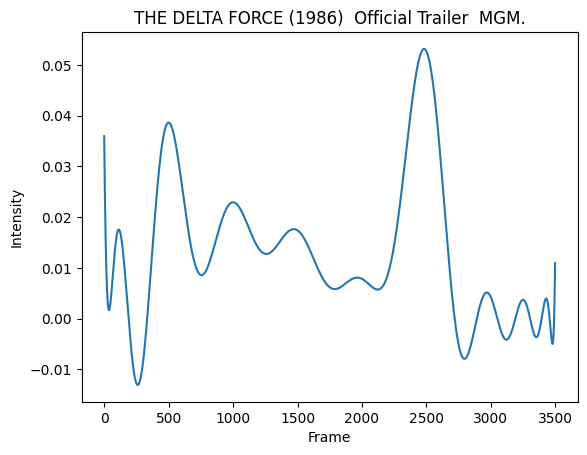

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


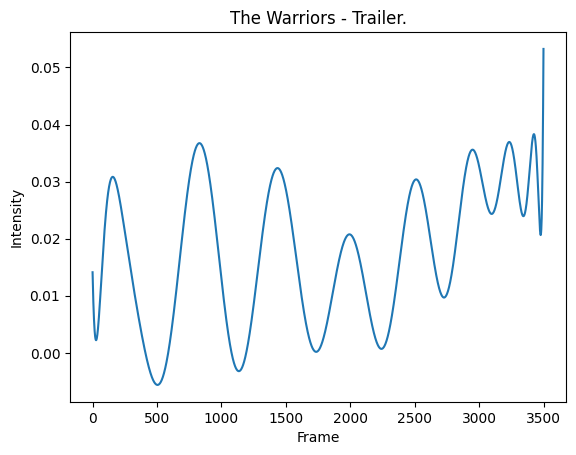

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


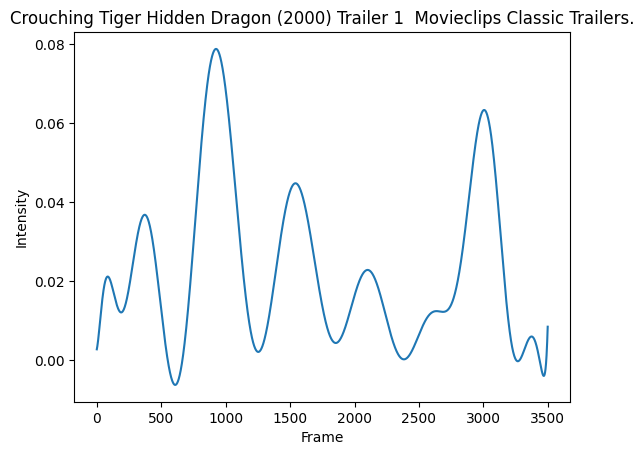

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


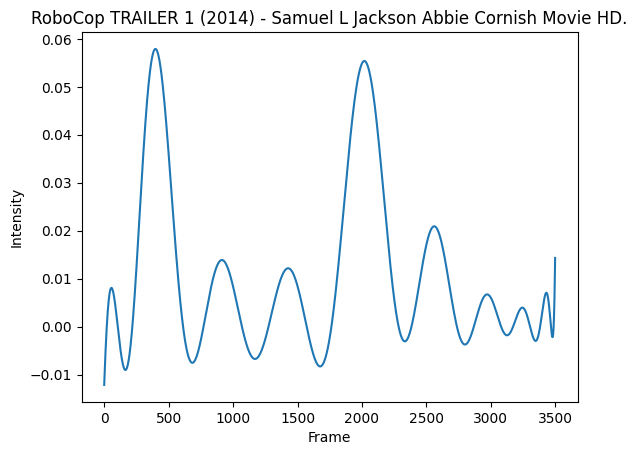

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


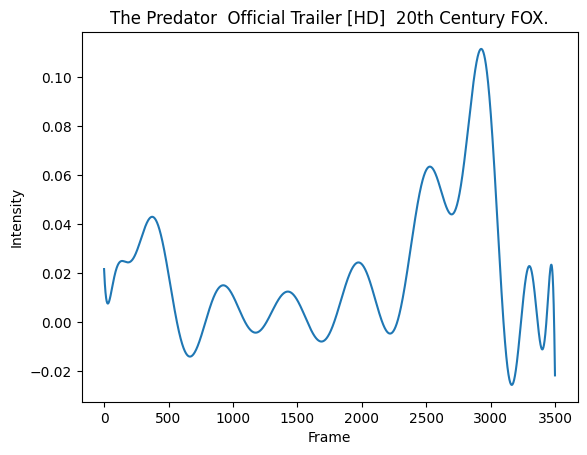

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


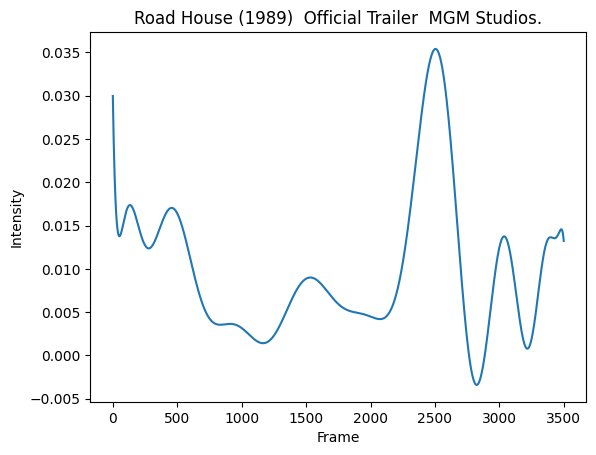

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


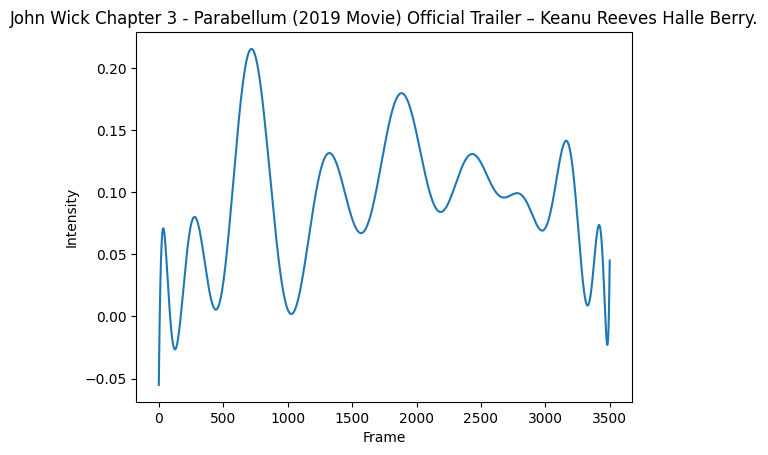

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


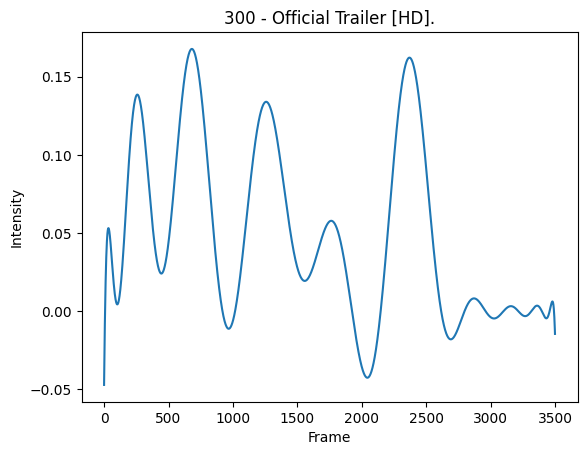

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


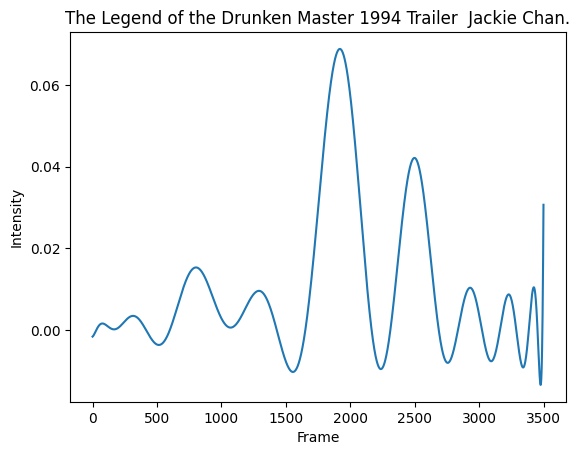

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


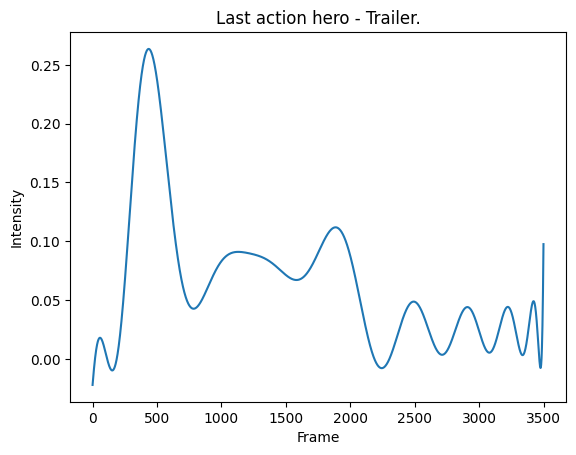

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


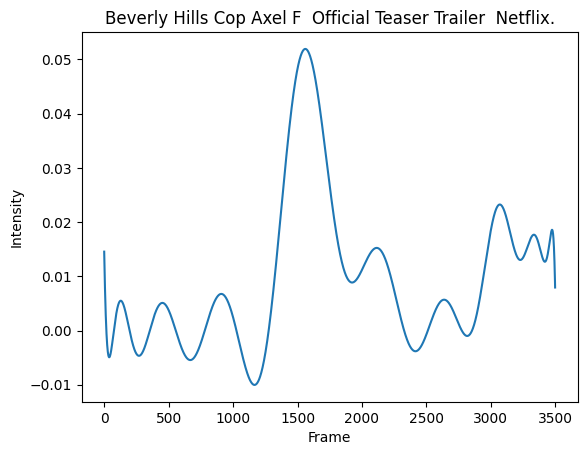

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


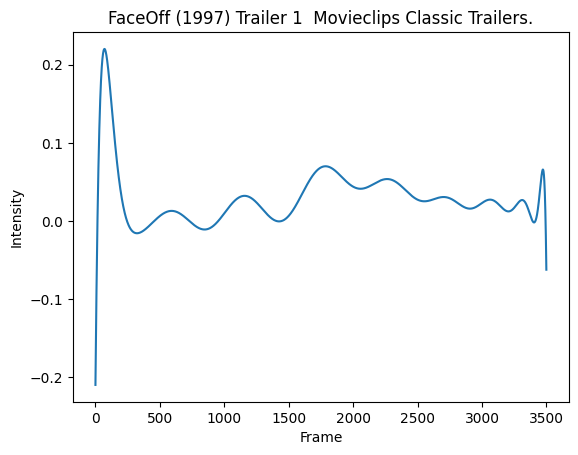

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


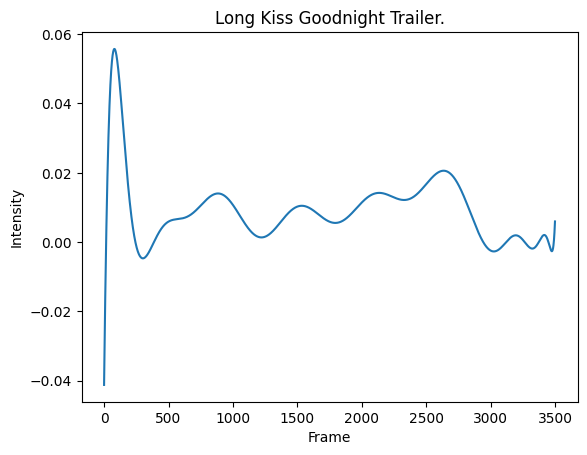

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


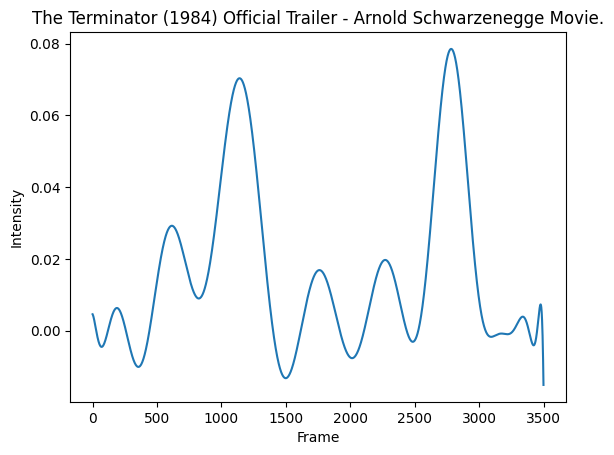

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


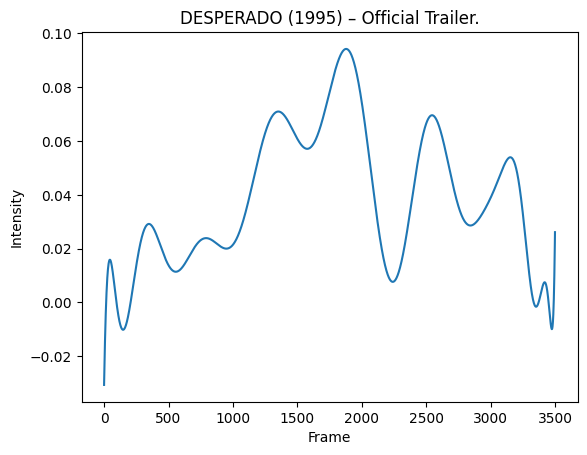

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


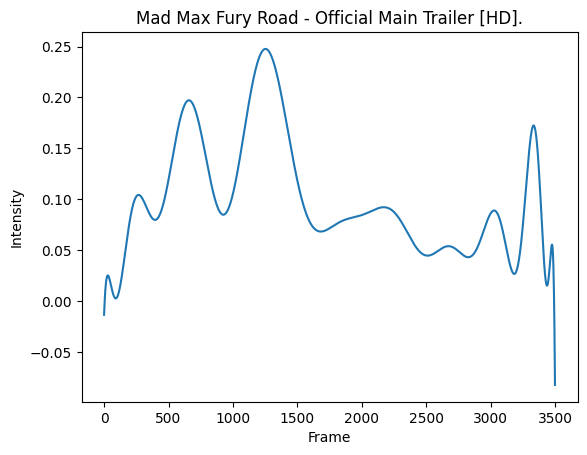

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


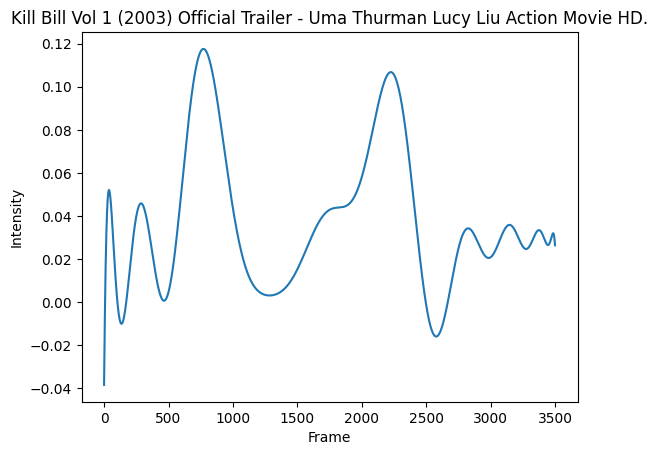

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


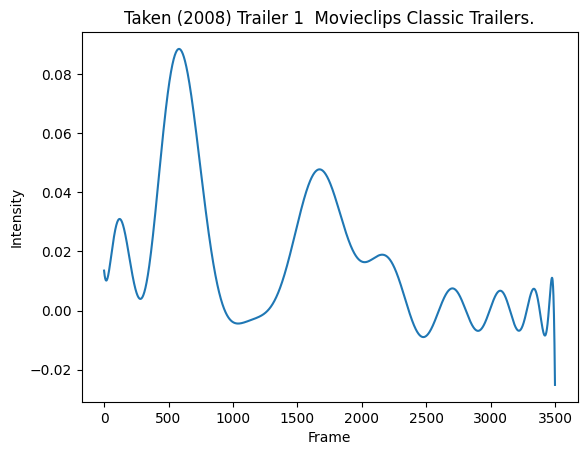

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


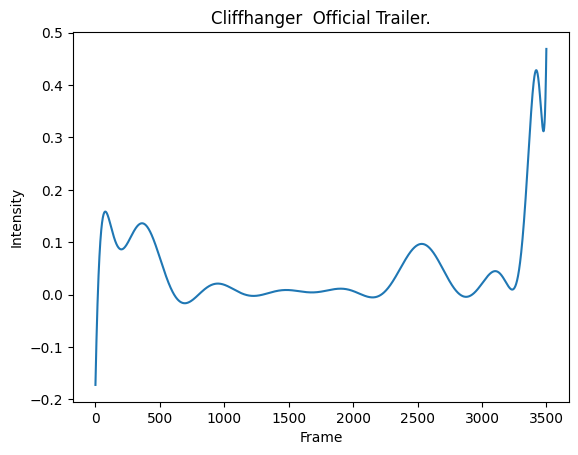

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


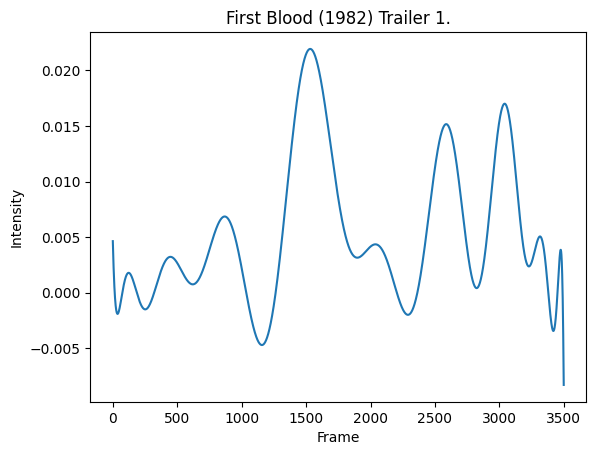

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


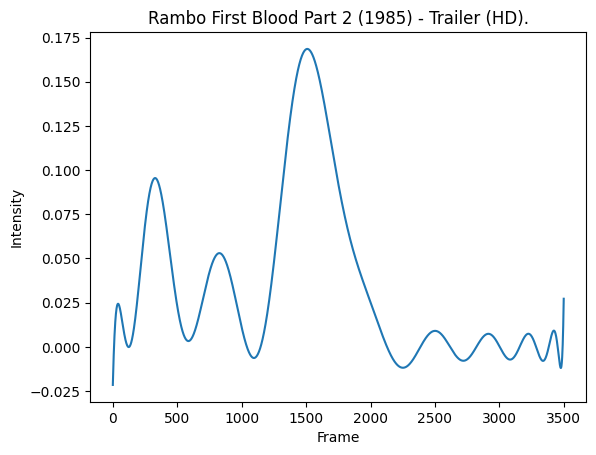

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


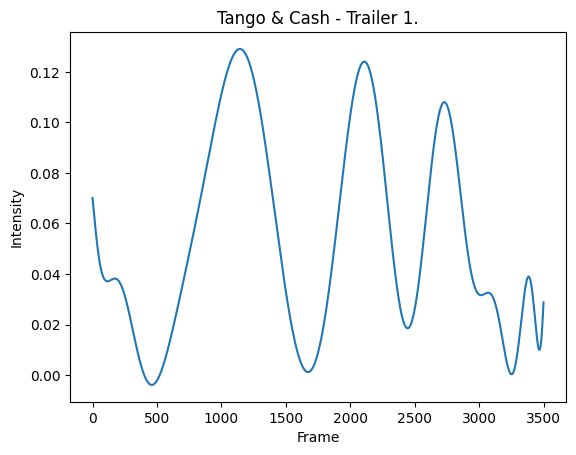

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


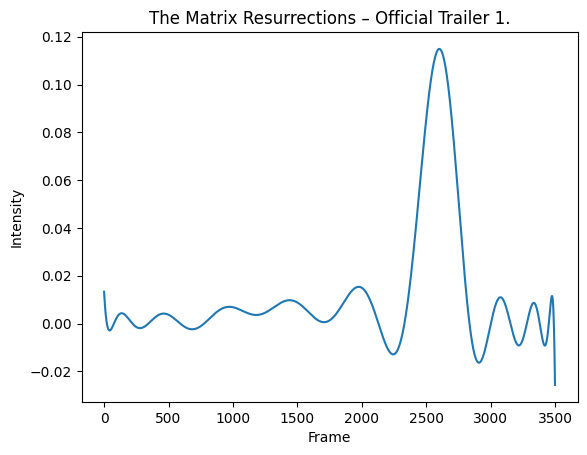

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


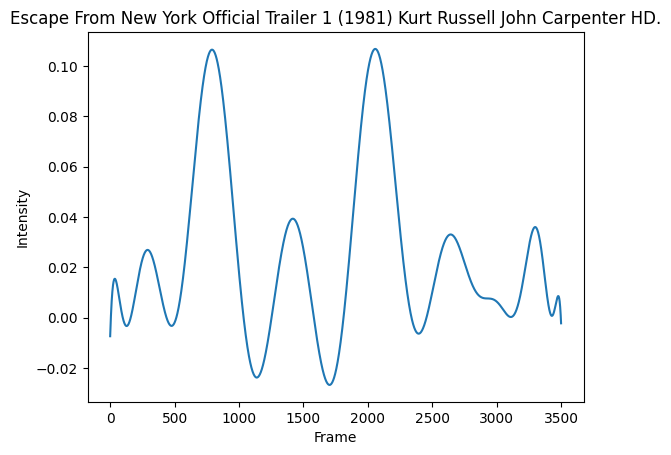

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


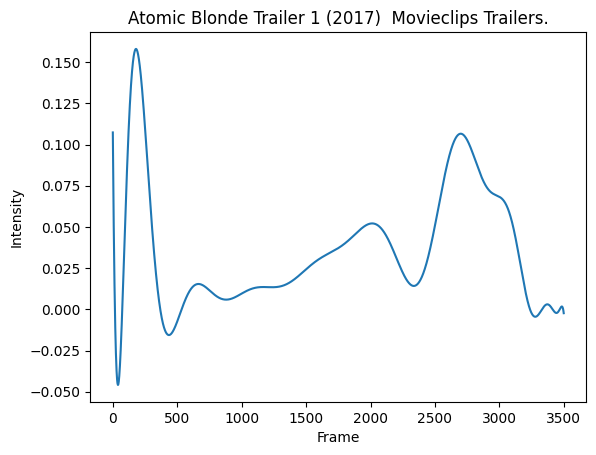

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


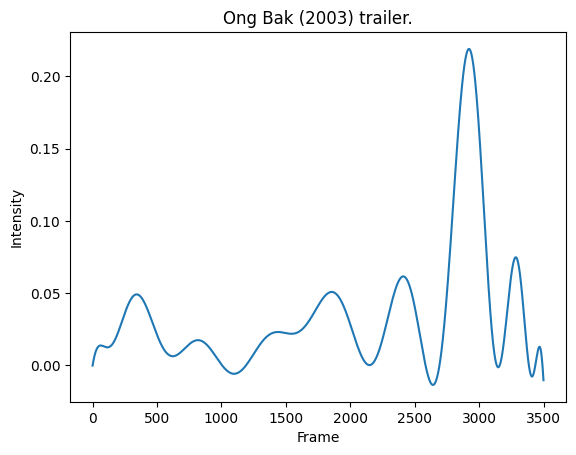

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


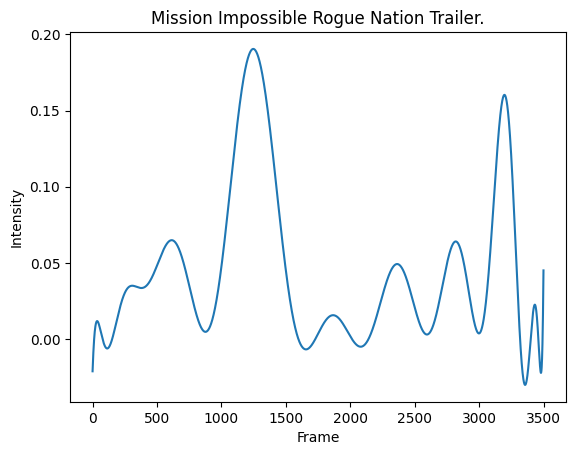

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


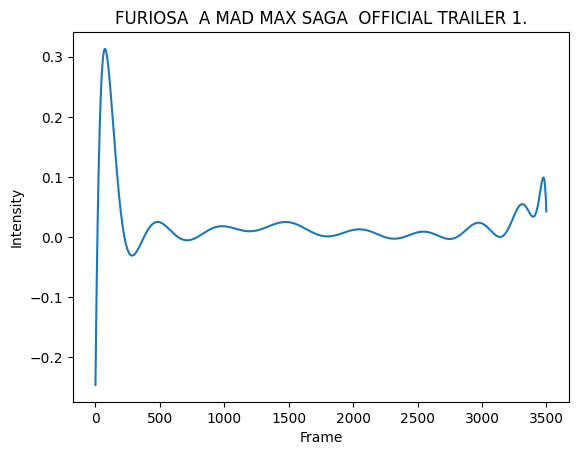

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


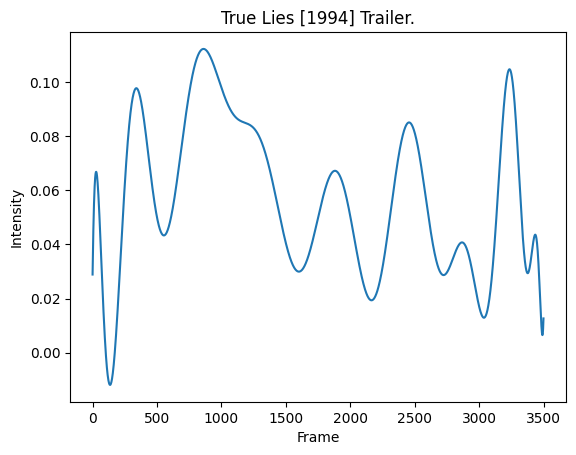

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


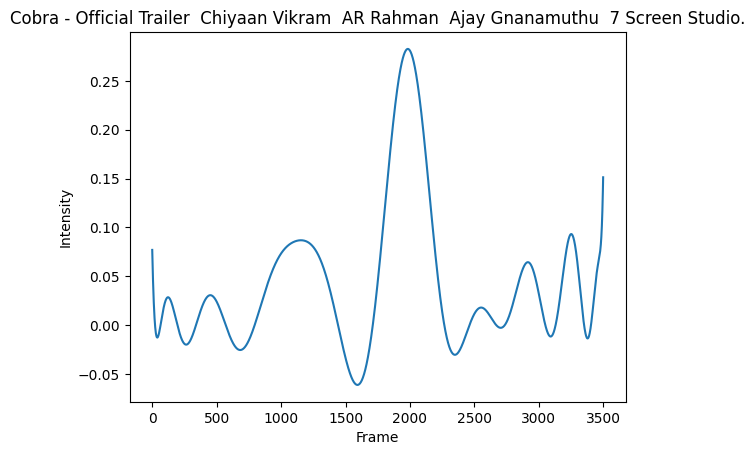

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


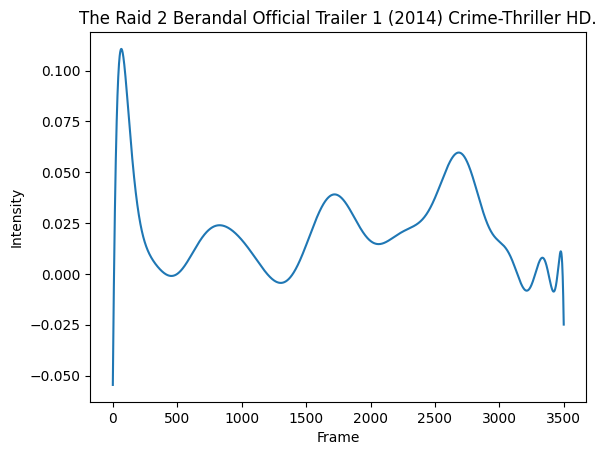

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


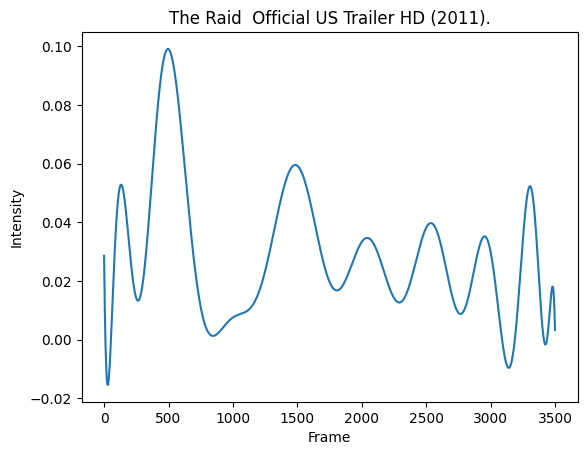

/var/folders/3p/xlr6tgyx4t980qpxnnrs12kc0000gn/T/ipykernel_6558/3470498100.py:20: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(list_x,list_y , approx)


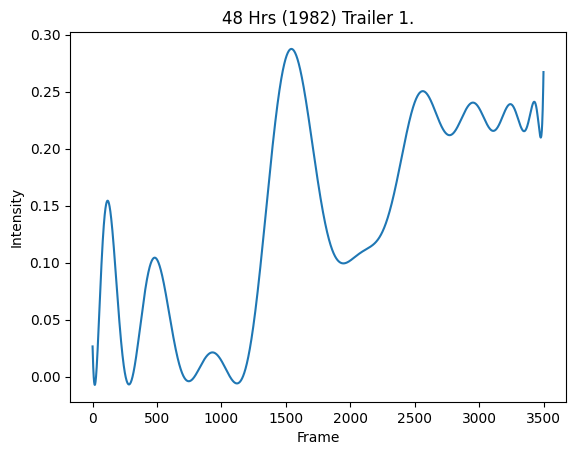

In [22]:
for movie_name , movie_intensity in zip(movie_name_list , action_movies_intensities_list_normalized):
    plot_aprroximate(range(3500) , movie_intensity , 30 , title = movie_name , 
                    xlabel="Frame" , ylabel="Intensity" , 
                    saveas = f'/Users/mohamedmafaz/Desktop/Trailer Analysis/Action pngs/{movie_name} intensity.png')


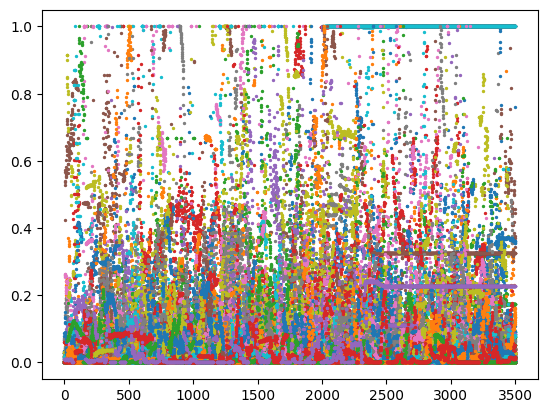

In [16]:
for i in action_movies_intensities_list_normalized:
    plt.scatter(range(3500) , i , s = 2)